In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

# Get data from here: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
seed = 410
rng = np.random.RandomState(seed)

In [43]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


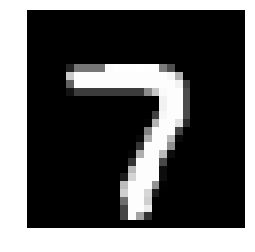

In [51]:
img_name = rng.choice(train.filename)
training_image_path = 'data/Images/train/' + img_name

training_img = imread(training_image_path, flatten=True)

pylab.imshow(training_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [12]:
# Each image is represented as numpy array

training_img

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

In [52]:
# store all images as numpy arrays, to make data manipulation easier

temp = []
for img_name in train.filename:
    training_image_path = 'data/Images/train/' + img_name
    training_img = imread(training_image_path, flatten=True)
    img = training_img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    testing_image_path = 'data/Images/test/' + img_name
    testing_img = imread(testing_image_path, flatten=True)
    img = testing_img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [53]:
train_x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [54]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [55]:
# split into training and validation sets, 7:3

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [56]:
train.label.ix[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
34305    8
34306    8
34307    9
34308    3
34309    8
34310    4
34311    6
34312    6
34313    3
34314    6
34315    7
34316    5
34317    3
34318    0
34319    3
34320    9
34321    3
34322    8
34323    8
34324    7
34325    4
34326    3
34327    8
34328    6
34329    5
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, dtype: int64

In [57]:
from keras.models import Sequential
from keras.layers import Dense

input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 100


model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=784)`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", input_dim=50)`


In [58]:
# model training

trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 1s - loss: 0.5080 - acc: 0.8657 - val_loss: 0.2955 - val_acc: 0.9162
Epoch 2/5
34300/34300 [==============================] - 1s - loss: 0.2469 - acc: 0.9299 - val_loss: 0.2328 - val_acc: 0.9349
Epoch 3/5
34300/34300 [==============================] - 1s - loss: 0.1932 - acc: 0.9449 - val_loss: 0.1991 - val_acc: 0.9454
Epoch 4/5
34300/34300 [==============================] - 1s - loss: 0.1606 - acc: 0.9538 - val_loss: 0.1810 - val_acc: 0.9477
Epoch 5/5
34300/34300 [==============================] - 1s - loss: 0.1369 - acc: 0.9613 - val_loss: 0.1609 - val_acc: 0.9546


19296/21000 [==========================>...] - ETA: 0sPrediction is:  9


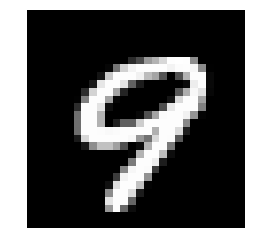

In [77]:
# model evaluation

pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
testing_image_path = 'data/Images/test/' + img_name
testing_img = imread(testing_image_path, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print "Prediction is: ", pred[test_index]

pylab.imshow(testing_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [35]:
# Improve the model
## Add hidden layers
## add Dropout to avoid overfitting
## increase epochs to increase training potentials

from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=784)`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=50)`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=50)`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=50)`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=50)`
/Library/Python/2.7/site

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop_more_epochs = model.fit(train_x, train_y, nb_epoch=epochs, 
                                                   batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/50
34300/34300 [==============================] - 2s - loss: 1.1752 - acc: 0.5934 - val_loss: 0.3836 - val_acc: 0.8929
Epoch 2/50
34300/34300 [==============================] - 1s - loss: 0.4911 - acc: 0.8594 - val_loss: 0.2781 - val_acc: 0.9224
Epoch 3/50
34300/34300 [==============================] - 2s - loss: 0.3748 - acc: 0.8993 - val_loss: 0.2298 - val_acc: 0.9364
Epoch 4/50
34300/34300 [==============================] - 1s - loss: 0.3172 - acc: 0.9155 - val_loss: 0.2131 - val_acc: 0.9420
Epoch 5/50
34300/34300 [==============================] - 1s - loss: 0.2834 - acc: 0.9243 - val_loss: 0.1953 - val_acc: 0.9471
Epoch 6/50
34300/34300 [==============================] - 1s - loss: 0.2648 - acc: 0.9296 - val_loss: 0.1901 - val_acc: 0.9488
Epoch 7/50
34300/34300 [==============================] - 1s - loss: 0.2413 - acc: 0.9371 - val_loss: 0.1849 - val_acc: 0.9504
Epoch 8/50
34300/34300 [==============================] - 2s 

In [38]:
# The above is using NN type 1 - MLP (multi-layer perceptrons)
# NN type 2 - CNN

# reshape data
## each given image here is 28*28
train_x_temp = train_x.reshape(-1, 28, 28, 1)
val_x_temp = val_x.reshape(-1, 28, 28, 1)

# define vars
input_shape = (784,)
input_reshape = (28, 28, 1)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 50
output_num_units = 10

epochs = 7
batch_size = 128

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 4, 4, activation='relu'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size, 
                               validation_data=(val_x_temp, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/7
34300/34300 [==============================] - 35s - loss: 0.4930 - acc: 0.8502 - val_loss: 0.1768 - val_acc: 0.9463
Epoch 2/7
34300/34300 [==============================] - 34s - loss: 0.1229 - acc: 0.9629 - val_loss: 0.1033 - val_acc: 0.9680
Epoch 3/7
34300/34300 [==============================] - 30s - loss: 0.0840 - acc: 0.9745 - val_loss: 0.0839 - val_acc: 0.9746
Epoch 4/7
34300/34300 [==============================] - 30s - loss: 0.0664 - acc: 0.9789 - val_loss: 0.0732 - val_acc: 0.9781
Epoch 5/7
34300/34300 [==============================] - 32s - loss: 0.0544 - acc: 0.9827 - val_loss: 0.0626 - val_acc: 0.9814
Epoch 6/7
34300/34300 [==============================] - 32s - loss: 0.0454 - acc: 0.9852 - val_loss: 0.0659 - val_acc: 0.9808
Epoch 7/7
34300/34300 [==============================] - 32s - loss: 0.0389 - acc: 0.9871 - val_loss: 0.0904 - val_acc: 0.9722


/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu")`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu")`
/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", input_dim=50)`


In [42]:
# TO-DO: predict results from CNN